In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt

## Loading the dataset

In [ ]:
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [ ]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
x_test.shape,y_test.shape

((10000, 28, 28), (10000,))

## Dataset Details

In [ ]:
unique, count = np.unique(y_train, return_counts=True)
print(unique,count)

[0 1 2 3 4 5 6 7 8 9] [5923 6742 5958 6131 5842 5421 5918 6265 5851 5949]


In [ ]:
unique, count = np.unique(y_test, return_counts=True)
print(unique,count)

[0 1 2 3 4 5 6 7 8 9] [ 980 1135 1032 1010  982  892  958 1028  974 1009]


## Dataset samples

In [ ]:
index =[10,16,1888,2000,20005]
images =x_train[index]
labels = y_train[index]

### Plotting image samples

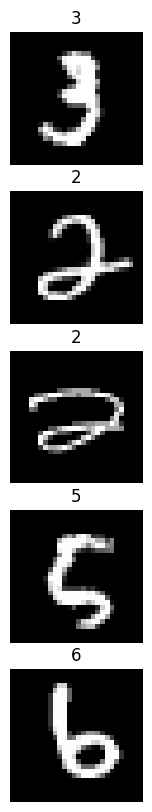

In [ ]:
plt.figure(figsize=(10,10))

for i in range(len(index)):
  plt.subplot(5,1,i+1)
  plt.imshow(images[i],cmap='gray')
  plt.title(labels[i])
  plt.axis('off')
plt.show()


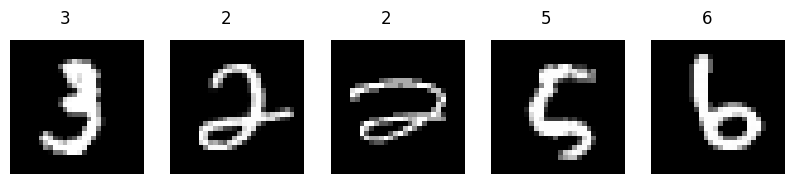

In [ ]:
plt.figure(figsize=(10,10))

for i in range(len(index)):
  plt.subplot(1,5,i+1)
  plt.imshow(images[i],cmap='gray')
  plt.text(10,-4,labels[i],fontsize=12)
  plt.axis('off')
plt.show()


In [ ]:
x_train.shape,y_train.shape

((60000, 28, 28), (60000,))

In [ ]:
x_test.shape,y_test.shape

((10000, 28, 28), (10000,))

In [ ]:
input_size= x_train.shape[1]*x_train.shape[2]
print(input_size)

784


## Converting to 1d

In [ ]:
x_train = np.reshape(x_train, [-1, input_size])
x_train.shape


(60000, 784)

In [ ]:
x_test = np.reshape(x_test, [-1, input_size])
x_test.shape

(10000, 784)

## Normalization

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## One hot encoding

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [ ]:
y_train[:2]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

## Model Building

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(256,activation='relu',input_dim=input_size))
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │          65,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 269,322 (1.03 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer= 'adam', loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=20,batch_size=128)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8650 - loss: 0.4748
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9689 - loss: 0.1007
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9809 - loss: 0.0625
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9864 - loss: 0.0439
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9898 - loss: 0.0323
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9920 - loss: 0.0248
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9928 - loss: 0.0207
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9955 - loss: 0.0141
Epoch 9/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9960 - loss: 0.0136
Epoch 10/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9961 - loss: 0.0120
Epoch 11/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9960 - loss: 0.0111
Epoch 12/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [ ]:
loss,acc=model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9795 - loss: 0.1143


In [ ]:
print(loss,acc)

0.08852840214967728 0.9836000204086304


# Cifar 10

In [ ]:
import numpy as np
from tensorflow.keras.datasets import mnist,cifar10
import matplotlib.pyplot as plt

## Loading the dataset

In [ ]:
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


In [ ]:
x_train.shape,y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [ ]:
x_test.shape,y_test.shape

((10000, 32, 32, 3), (10000, 1))

## Dataset Details

In [ ]:
unique, count = np.unique(y_train, return_counts=True)
print(unique,count)

[0 1 2 3 4 5 6 7 8 9] [5000 5000 5000 5000 5000 5000 5000 5000 5000 5000]


In [ ]:
unique, count = np.unique(y_test, return_counts=True)
print(unique,count)

[0 1 2 3 4 5 6 7 8 9] [1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]


## Dataset samples

In [ ]:
index =[10,16,1888,2000,20005]
images =x_train[index]
labels = y_train[index]

### Plotting image samples

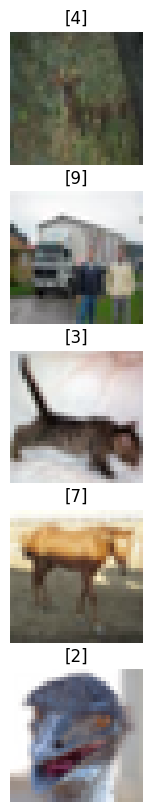

In [ ]:
plt.figure(figsize=(10,10))

for i in range(len(index)):
  plt.subplot(5,1,i+1)
  plt.imshow(images[i])
  plt.title(labels[i])
  plt.axis('off')
plt.show()


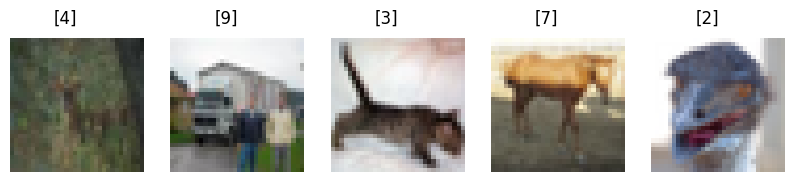

In [ ]:
plt.figure(figsize=(10,10))

for i in range(len(index)):
  plt.subplot(1,5,i+1)
  plt.imshow(images[i],cmap='gray')
  plt.text(10,-4,labels[i],fontsize=12)
  plt.axis('off')
plt.show()


In [ ]:
x_train.shape,y_train.shape

((50000, 32, 32, 3), (50000, 1))

In [ ]:
x_test.shape,y_test.shape

((10000, 32, 32, 3), (10000, 1))

In [ ]:
input_size= x_train.shape[1]*x_train.shape[2]*x_train.shape[3]
print(input_size)

3072


## Converting to 1d

In [ ]:
x_train = np.reshape(x_train, [-1, input_size])
x_train.shape


(50000, 3072)

In [ ]:
x_test = np.reshape(x_test, [-1, input_size])
x_test.shape

(10000, 3072)

## Normalization

In [ ]:
x_train = x_train/255.0
x_test = x_test/255.0

In [ ]:
x_train

array([[0.23137255, 0.24313725, 0.24705882, ..., 0.48235294, 0.36078431,
        0.28235294],
       [0.60392157, 0.69411765, 0.73333333, ..., 0.56078431, 0.52156863,
        0.56470588],
       [1.        , 1.        , 1.        , ..., 0.31372549, 0.3372549 ,
        0.32941176],
       ...,
       [0.1372549 , 0.69803922, 0.92156863, ..., 0.04705882, 0.12156863,
        0.19607843],
       [0.74117647, 0.82745098, 0.94117647, ..., 0.76470588, 0.74509804,
        0.67058824],
       [0.89803922, 0.89803922, 0.9372549 , ..., 0.63921569, 0.63921569,
        0.63137255]])

## One hot encoding

In [ ]:
from tensorflow.keras.utils import to_categorical

In [ ]:
y_train=to_categorical(y_train)
y_test=to_categorical(y_test)

In [ ]:
y_train[:2]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

## Model Building

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(1024,activation='relu',input_dim=input_size))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 1024)                │       3,146,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 512)                 │         262,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,068,106 (15.52 MB)

 Trainable params: 4,068,106 (15.52 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer= 'adam', loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10,batch_size=128)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - accuracy: 0.2427 - loss: 2.0702
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.3845 - loss: 1.7104
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4232 - loss: 1.5986
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.4540 - loss: 1.5291
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.4713 - loss: 1.4807
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4841 - loss: 1.4331
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.4977 - loss: 1.3998
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5044 - loss: 1.3685
Epoch 9/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.5222 - loss: 1.3323
Epoch 10/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5401 - loss: 1.2818


In [ ]:
loss,acc=model.evaluate(x_test,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5127 - loss: 1.3884


In [ ]:
print(loss,acc)

1.4005982875823975 0.5054000020027161
